In [5]:
import numpy as mp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from datetime import timedelta
import covsirphy as cs
from matplotlib.ticker import ScalarFormatter

In [6]:
scenario = cs.ODEScenario.auto_build(geo='Japan', model=cs.SIRFModel)

100%|██████████| 68/68 [01:30<00:00,  1.32s/it]


In [7]:
scenario.summary()

Start        End    Rt     theta     kappa       rho  \
Scenario Phase                                                             
Baseline 0th   2020-02-23 2020-08-10  1.29  0.257366  0.000032  0.002206   
         1st   2020-08-11 2020-11-16  0.86  0.001529  0.000012  0.000855   
         2nd   2020-11-17 2020-12-24  1.49  0.002052  0.000012   0.00141   
         3rd   2020-12-25 2021-01-16  1.41  0.000059  0.000015  0.001307   
         4th   2021-01-17 2021-02-10  0.66  0.001868  0.000016  0.000537   
...                   ...        ...   ...       ...       ...       ...   
         63rd  2023-03-12 2023-03-27  1.65  0.000713  0.000003  0.001128   
         64th  2023-03-28 2023-04-07  0.84  0.005808  0.000003  0.001931   
         65th  2023-04-08 2023-04-18  1.44  0.002266  0.000003  0.001685   
         66th  2023-04-19 2023-04-27  2.12  0.000139  0.000006  0.001283   
         67th  2023-04-28 2023-05-08  1.55  0.001101  0.000001  0.001607   

                   sigma  alpha1 [-]  1/alpha2 [day]  1/beta [day]  \
Scenario Phase                                                       
Baseline 0th    0.001242       0.257             525             8   
         1st    0.000982       0.002            1339            20   
         2nd    0.000934       0.002            1413            12   
         3rd    0.000909         0.0            1128            13   
         4th    0.000798       0.002            1032            31   
...                  ...         ...             ...           ...   
         63rd    0.00068       0.001            5229            15   
         64th   0.002281       0.006            6277             9   
         65th   0.001164       0.002            6230            10   
         66th     0.0006         0.0            2825            13   
         67th   0.001034       0.001           12025            10   

                1/gamma [day]          ODE  tau  
Scenario Phase                                   
Baseline 0th               13  SIR-F Model   24  
         1st               17  SIR-F Model   24  
         2nd               18  SIR-F Model   24  
         3rd               18  SIR-F Model   24  
         4th               21  SIR-F Model   24  
...                       ...          ...  ...  
         63rd              24  SIR-F Model   24  
         64th               7  SIR-F Model   24  
         65th              14  SIR-F Model   24  
         66th              28  SIR-F Model   24  
         67th              16  SIR-F Model   24  

[68 rows x 13 columns]

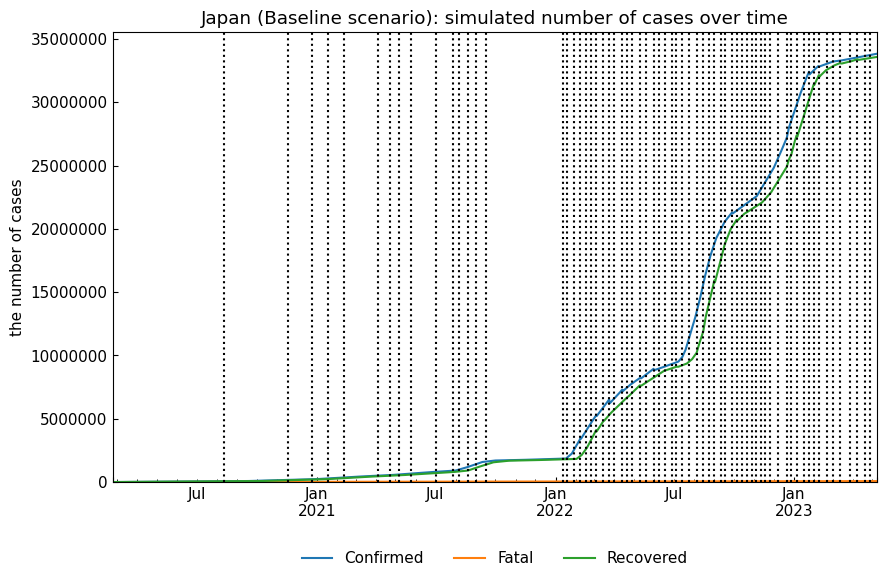

,Confirmed,Fatal,Recovered
Date,,,
2020-02-23,128.0,1.0,25.0
2020-02-24,142.0,5.0,33.0
2020-02-25,157.0,9.0,41.0
2020-02-26,170.0,12.0,49.0
2020-02-27,184.0,16.0,57.0
...,...,...,...
2023-05-04,33795343.0,74671.0,33548837.0
2023-05-05,33807538.0,74699.0,33559543.0
2023-05-06,33819833.0,74727.0,33570339.0


In [14]:
scenario.simulate(name="Baseline")

In [8]:
scenario.track()

,Scenario,Phase,Rt,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],ODE,tau
Date,,,,,,,,,,,,,
2020-02-23,Baseline,0th,1.29,0.257366,0.000032,0.002206,0.001242,0.257,525,8,13,SIR-F Model,24
2020-02-24,Baseline,0th,1.29,0.257366,0.000032,0.002206,0.001242,0.257,525,8,13,SIR-F Model,24
2020-02-25,Baseline,0th,1.29,0.257366,0.000032,0.002206,0.001242,0.257,525,8,13,SIR-F Model,24
2020-02-26,Baseline,0th,1.29,0.257366,0.000032,0.002206,0.001242,0.257,525,8,13,SIR-F Model,24
2020-02-27,Baseline,0th,1.29,0.257366,0.000032,0.002206,0.001242,0.257,525,8,13,SIR-F Model,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-04,Baseline,67th,1.55,0.001101,0.000001,0.001607,0.001034,0.001,12025,10,16,SIR-F Model,24
2023-05-05,Baseline,67th,1.55,0.001101,0.000001,0.001607,0.001034,0.001,12025,10,16,SIR-F Model,24
2023-05-06,Baseline,67th,1.55,0.001101,0.000001,0.001607,0.001034,0.001,12025,10,16,SIR-F Model,24


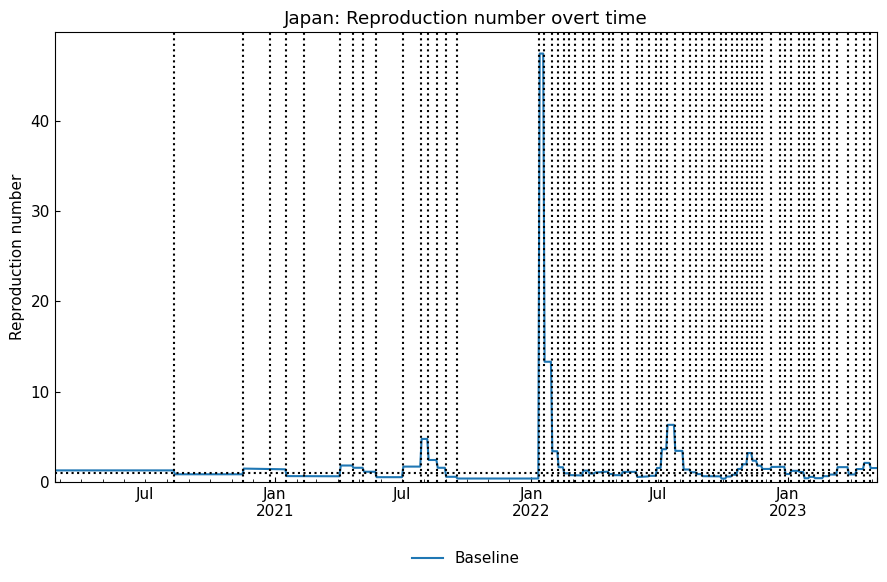

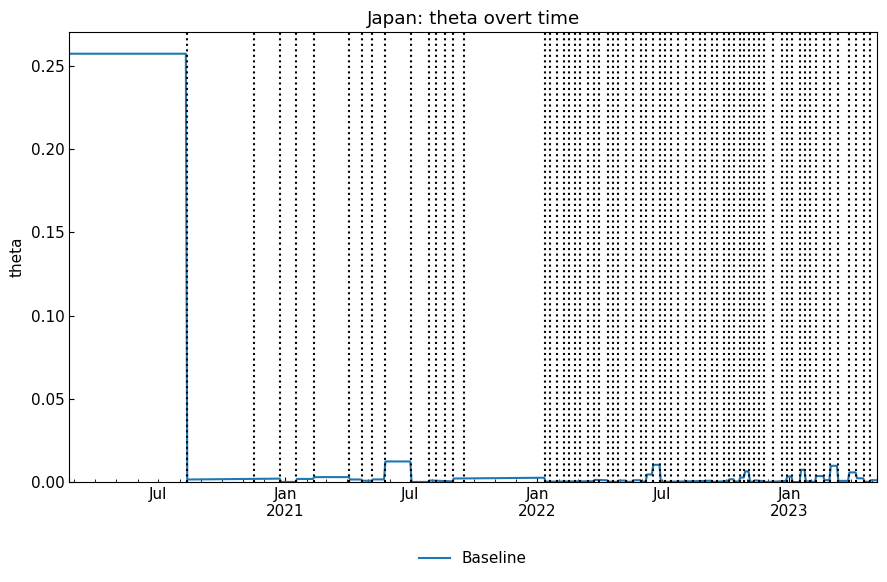

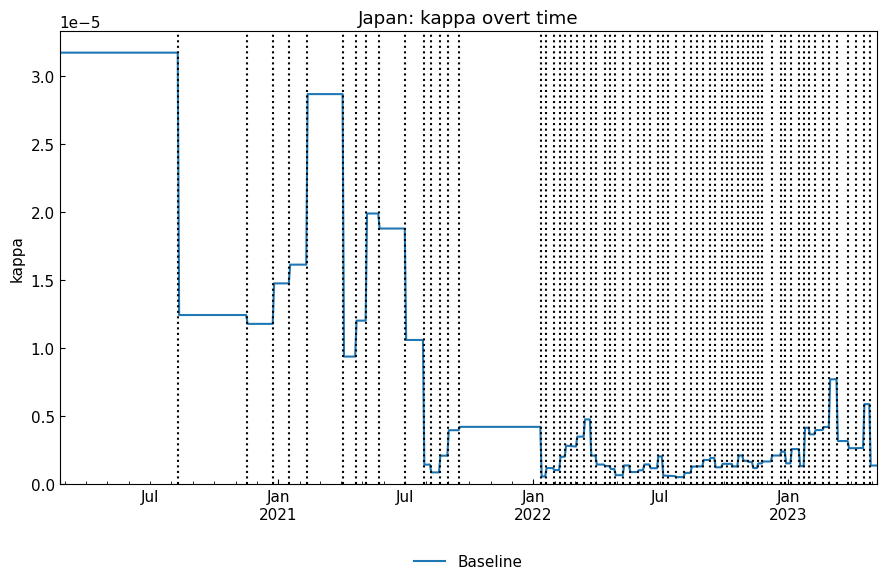

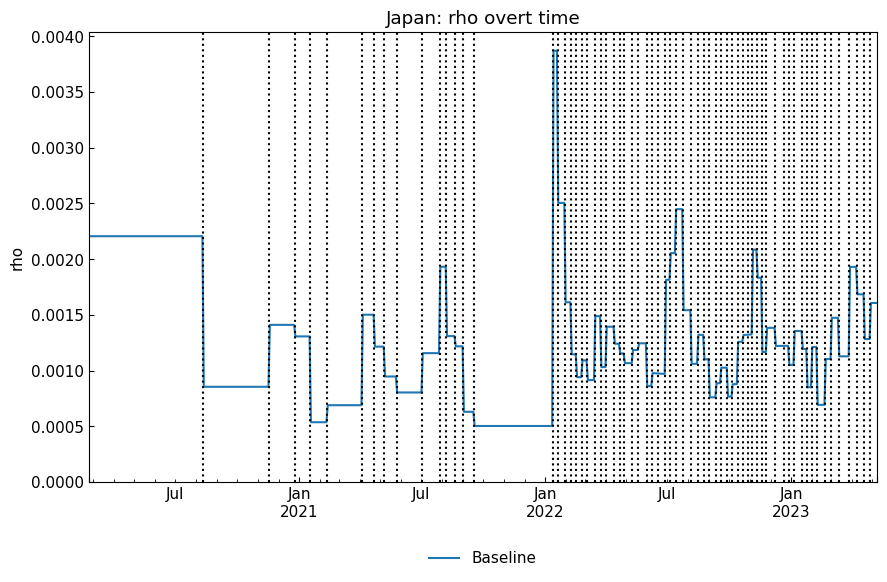

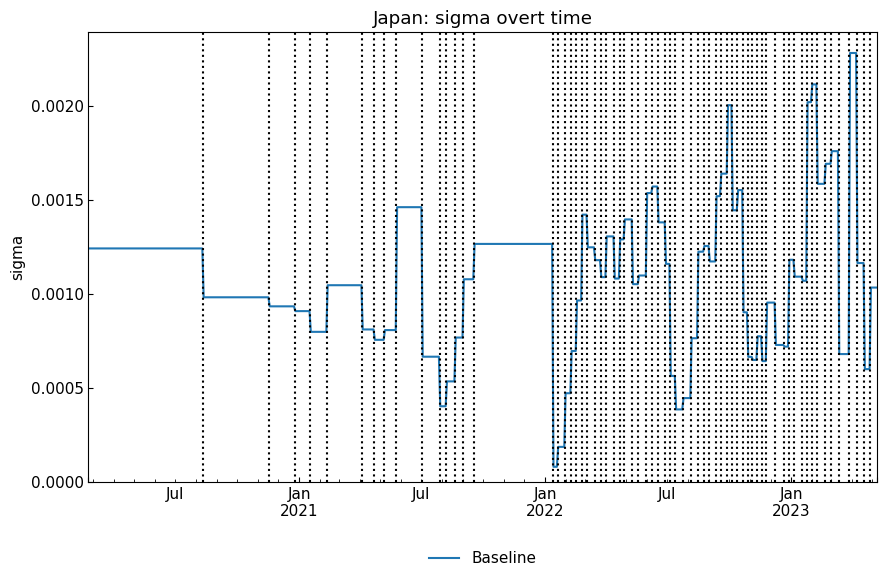

Scenario,Baseline
Date,
2020-02-23,0.001242
2020-02-24,0.001242
2020-02-25,0.001242
2020-02-26,0.001242
2020-02-27,0.001242
...,...
2023-05-04,0.001034
2023-05-05,0.001034
2023-05-06,0.001034


In [9]:
scenario.compare_param("Rt")
scenario.compare_param("theta")
scenario.compare_param("kappa")
scenario.compare_param("rho")
scenario.compare_param("sigma")

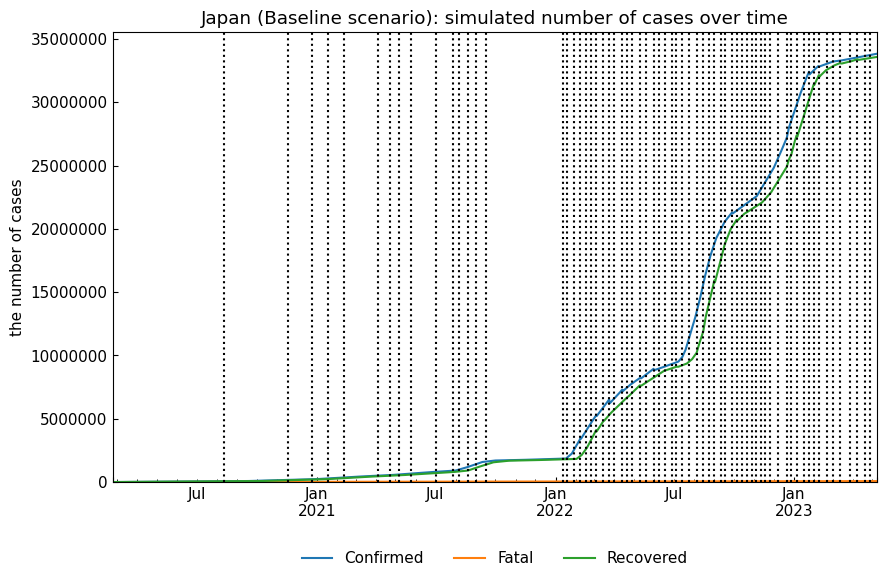

,Confirmed,Fatal,Recovered
Date,,,
2020-02-23,128.0,1.0,25.0
2020-02-24,142.0,5.0,33.0
2020-02-25,157.0,9.0,41.0
2020-02-26,170.0,12.0,49.0
2020-02-27,184.0,16.0,57.0
...,...,...,...
2023-05-04,33795343.0,74671.0,33548837.0
2023-05-05,33807538.0,74699.0,33559543.0
2023-05-06,33819833.0,74727.0,33570339.0


In [15]:
scenario.simulate(name="Baseline")

In [16]:
future_start_date = scenario.simulate(display=False).index.max() + timedelta(days=1)
future_start_date

scenario.build_with_template(name="Predicted", template="Baseline");
scenario.predict(days=7, name="Predicted")

Using 3 cpus for n_jobs.
Model Number: 1 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "fake_date", "transformations": {"0": "DifferencedTransformer", "1": "SinTrend"}, "transformation_params": {"0": {}, "1": {}}}
Model Number: 2 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "mean", "transformations": {"0": "ClipOutliers", "1": "QuantileTransformer", "2": "DifferencedTransformer"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}, "2": {}}}
Model Number: 3 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "SeasonalDifference", "1": "Round", "2": "Detrend"}, "transformation_params": {"0": {"lag_1": 7, "method": "Mean"}, "1": {"model": "middle", "decimals":

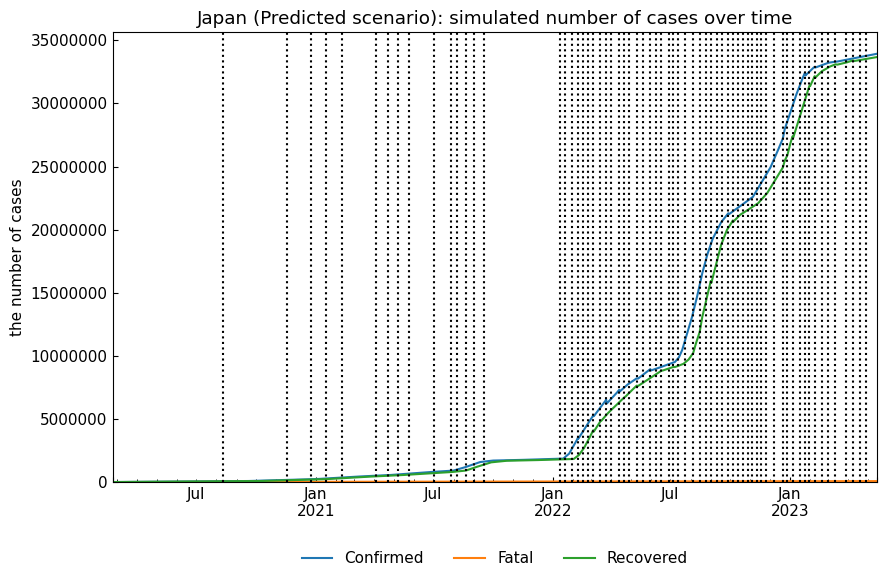

,Confirmed,Fatal,Recovered
Date,,,
2020-02-23,128.0,1.0,25.0
2020-02-24,142.0,5.0,33.0
2020-02-25,157.0,9.0,41.0
2020-02-26,170.0,12.0,49.0
2020-02-27,184.0,16.0,57.0
...,...,...,...
2023-05-11,33882865.0,74870.0,33625706.0
2023-05-12,33895788.0,74900.0,33637062.0
2023-05-13,33908817.0,74929.0,33648514.0


In [17]:
scenario.simulate(name="Predicted")

In [18]:
scenario.build_with_template(name="Predicted", template="Baseline")
scenario.predict(days=30, name="Predicted")

Using 3 cpus for n_jobs.
Model Number: 1 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "fake_date", "transformations": {"0": "DifferencedTransformer", "1": "SinTrend"}, "transformation_params": {"0": {}, "1": {}}}
Model Number: 2 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "mean", "transformations": {"0": "ClipOutliers", "1": "QuantileTransformer", "2": "DifferencedTransformer"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}, "2": {}}}
Model Number: 3 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "SeasonalDifference", "1": "Round", "2": "Detrend"}, "transformation_params": {"0": {"lag_1": 7, "method": "Mean"}, "1": {"model": "middle", "decimals":

In [19]:
df = scenario.append().summary()
df.loc[df["Start"] >= future_start_date]

Start        End    Rt  theta     kappa       rho  \
Scenario  Phase                                                          
Predicted 68th  2023-05-09 2023-05-14  1.22    0.0  0.000003  0.001607   
          69th  2023-05-15 2023-05-23  1.18    0.0  0.000003  0.001607   
          70th  2023-05-24 2023-06-03  1.15    0.0  0.000003  0.001607   
          71st  2023-06-04 2023-06-07  1.87    0.0  0.000003  0.001607   

                    sigma  alpha1 [-]  1/alpha2 [day]  1/beta [day]  \
Scenario  Phase                                                       
Predicted 68th    0.00131         0.0            5088            10   
          69th   0.001363         0.0            5185            10   
          70th   0.001396         0.0            5329            10   
          71st   0.000857         0.0            5425            10   

                 1/gamma [day]          ODE  tau  
Scenario  Phase                                   
Predicted 68th              13  SIR-F Model   24  
          69th              12  SIR-F Model   24  
          70th              12  SIR-F Model   24  
          71st              19  SIR-F Model   24

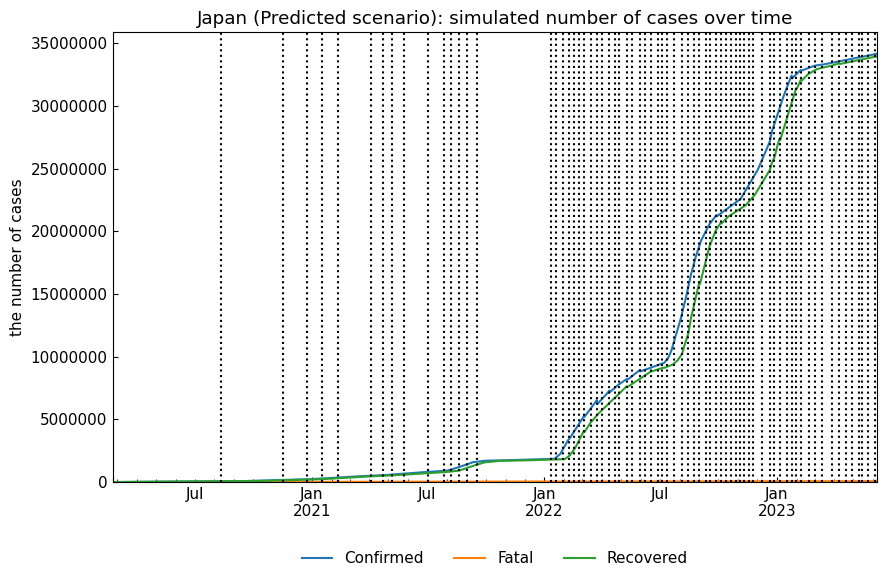

,Confirmed,Fatal,Recovered
Date,,,
2020-02-23,128.0,1.0,25.0
2020-02-24,142.0,5.0,33.0
2020-02-25,157.0,9.0,41.0
2020-02-26,170.0,12.0,49.0
2020-02-27,184.0,16.0,57.0
...,...,...,...
2023-06-03,34135800.0,75570.0,33925760.0
2023-06-04,34145203.0,75595.0,33936951.0
2023-06-05,34154630.0,75620.0,33943838.0


In [20]:
scenario.simulate(name="Predicted")

In [21]:
scenario.build_with_template(name="Predicted", template="Baseline")
scenario.predict(days=300, name="Predicted")

Using 3 cpus for n_jobs.
Model Number: 1 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "fake_date", "transformations": {"0": "DifferencedTransformer", "1": "SinTrend"}, "transformation_params": {"0": {}, "1": {}}}
Model Number: 2 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "mean", "transformations": {"0": "ClipOutliers", "1": "QuantileTransformer", "2": "DifferencedTransformer"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}, "2": {}}}
Model Number: 3 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "SeasonalDifference", "1": "Round", "2": "Detrend"}, "transformation_params": {"0": {"lag_1": 7, "method": "Mean"}, "1": {"model": "middle", "decimals":

In [22]:
df = scenario.append().summary()
df.loc[df["Start"] >= future_start_date]

Start        End    Rt     theta     kappa       rho  \
Scenario  Phase                                                             
Predicted 68th  2023-06-08 2023-06-10  1.42  0.001101  0.000001  0.001603   
          69th  2023-06-11 2023-06-13  1.42  0.001101  0.000001  0.001603   
          70th  2023-06-14 2023-06-16  1.42  0.001101  0.000001  0.001603   
          71st  2023-06-17 2023-06-19  1.42  0.001101  0.000001  0.001603   
          72nd  2023-06-20 2023-06-22  1.42  0.001101  0.000001  0.001603   
          73rd  2023-06-23 2023-06-25  1.42  0.001102  0.000001  0.001603   
          74th  2023-06-26 2023-06-28  1.42  0.001102  0.000001  0.001603   
          75th  2023-06-29 2023-07-01  1.42  0.001102  0.000001  0.001603   
          76th  2023-07-02 2023-07-04  1.42  0.001102  0.000001  0.001603   
          77th  2023-07-05 2023-07-07  1.42  0.001102  0.000001  0.001603   
          78th  2023-07-08 2023-10-01  1.42  0.001107  0.000001  0.001603   
          79th  2023-10-02 2023-10-05  1.41  0.001107  0.000001  0.001603   
          80th  2023-10-06 2023-10-08  1.41  0.001108  0.000001  0.001603   
          81st  2023-10-09 2023-10-11  1.41  0.001108  0.000001  0.001603   
          82nd  2023-10-12 2023-10-14  1.41  0.001108  0.000001  0.001603   
          83rd  2023-10-15 2023-10-17  1.41  0.001108  0.000001  0.001603   
          84th  2023-10-18 2023-10-20  1.41  0.001108  0.000001  0.001603   
          85th  2023-10-21 2023-10-23  1.41  0.001108  0.000001  0.001603   
          86th  2023-10-24 2023-10-26  1.41  0.001109  0.000001  0.001603   
          87th  2023-10-27 2023-10-29  1.41  0.001109  0.000001  0.001603   
          88th  2023-10-30 2023-11-01  1.41  0.001109  0.000001  0.001603   
          89th  2023-11-02 2023-11-04  1.41  0.001109  0.000001  0.001603   
          90th  2023-11-05 2023-11-07  1.41  0.001109  0.000001  0.001603   
          91st  2023-11-08 2023-11-10  1.41  0.001109  0.000001  0.001603   
          92nd  2023-11-11 2023-11-13  1.41   0.00111  0.000001  0.001603   
          93rd  2023-11-14 2023-11-16  1.41   0.00111  0.000001  0.001603   
          94th  2023-11-17 2023-11-19  1.41   0.00111  0.000001  0.001603   
          95th  2023-11-20 2023-11-22  1.41   0.00111  0.000001  0.001603   
          96th  2023-11-23 2024-02-18  1.41  0.001115  0.000001  0.001607   
          97th  2024-02-19 2024-02-21  1.41  0.001115  0.000001  0.001607   
          98th  2024-02-22 2024-02-24  1.41  0.001115  0.000001  0.001607   
          99th  2024-02-25 2024-02-27  1.41  0.001116  0.000001  0.001607   
          100th 2024-02-28 2024-03-01  1.41  0.001116  0.000001  0.001607   
          101st 2024-03-02 2024-03-04  1.41  0.001116  0.000001  0.001607   
          102nd 2024-03-05 2024-03-07  1.41  0.001116  0.000001  0.001607   
          103rd 2024-03-08 2024-03-10  1.41  0.001116  0.000001  0.001607   
          104th 2024-03-11 2024-03-13  1.41  0.001116  0.000001  0.001607   
          105th 2024-03-14 2024-03-16  1.41  0.001117  0.000001  0.001607   
          106th 2024-03-17 2024-03-19  1.41  0.001117  0.000001  0.001607   
          107th 2024-03-20 2024-03-22  1.41  0.001117  0.000001  0.001607   
          108th 2024-03-23 2024-03-25  1.41  0.001117  0.000001  0.001607   
          109th 2024-03-26 2024-03-28  1.41  0.001117  0.000001  0.001607   
          110th 2024-03-29 2024-03-31  1.41  0.001117  0.000001  0.001607   

                    sigma  alpha1 [-]  1/alpha2 [day]  1/beta [day]  \
Scenario  Phase                                                       
Predicted 68th   0.001123       0.001           12025            10   
          69th   0.001124       0.001           12025            10   
          70th   0.001124       0.001           12025            10   
          71st   0.001124       0.001           12025            10   
          72nd   0.001124       0.001           12025            10   
          73rd   0.001124       0.001           12025     

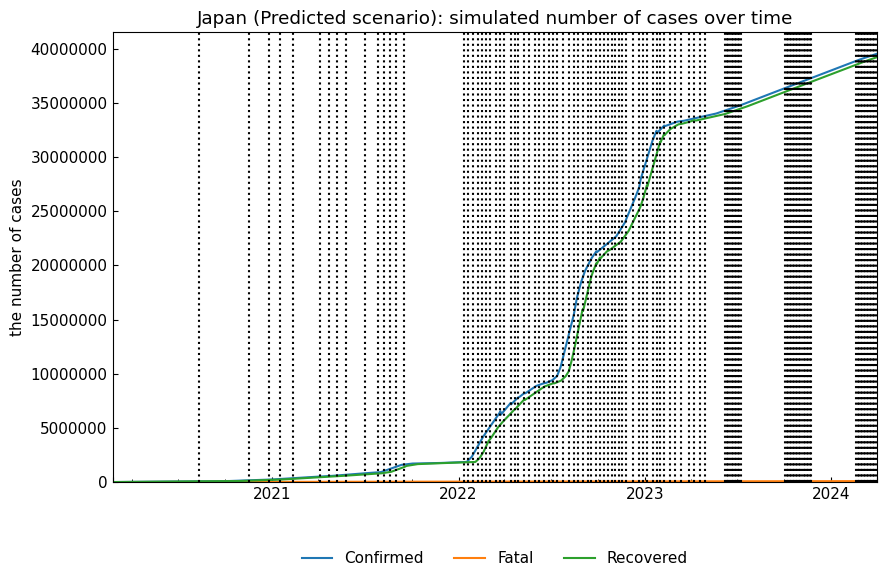

,Confirmed,Fatal,Recovered
Date,,,
2020-02-23,128.0,1.0,25.0
2020-02-24,142.0,5.0,33.0
2020-02-25,157.0,9.0,41.0
2020-02-26,170.0,12.0,49.0
2020-02-27,184.0,16.0,57.0
...,...,...,...
2024-03-27,39474442.0,87882.0,39154102.0
2024-03-28,39489844.0,87918.0,39169988.0
2024-03-29,39505209.0,87955.0,39185838.0


In [23]:
scenario.simulate(name="Predicted")